# s20250318 - blue laser works

In [6]:


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn=warn
FutureWarning = warn
def reset_scope(scope):
    try:
        scope.read()
    except:
        pass



import sys
sys.path.append('/home/stephane/pythonlib/selfmixing/')
import warnings
warnings.filterwarnings('ignore')
from loadmefirst import *
import selfmixing as sm
from scipy.signal import savgol_filter
import time

from IPython.display import Image 

import sys
sys.path.append('/home/stephane/pythonlib/instruments/rtb2004')
sys.path.append('/home/stephane/pythonlib/instruments/sounddriver')
sys.path.append('/home/stephane/pythonlib/instruments/waverunner')
sys.path.append('/home/stephane/pythonlib/instruments/hp33500')

import rtb
import hp33500
import LeCroy_novxi_py3 as lc
from importlib import reload
#import sounddriver as sd
from numpy import *
from scipy import signal
from numpy import random
import pickle
from matplotlib.pyplot import *
from threading import Thread, Event
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
ls

s20250318_screenshot_blue2.png  s20250318_screenshot_blue.png
s20250318_screenshot_blue3.png  Untitled.ipynb


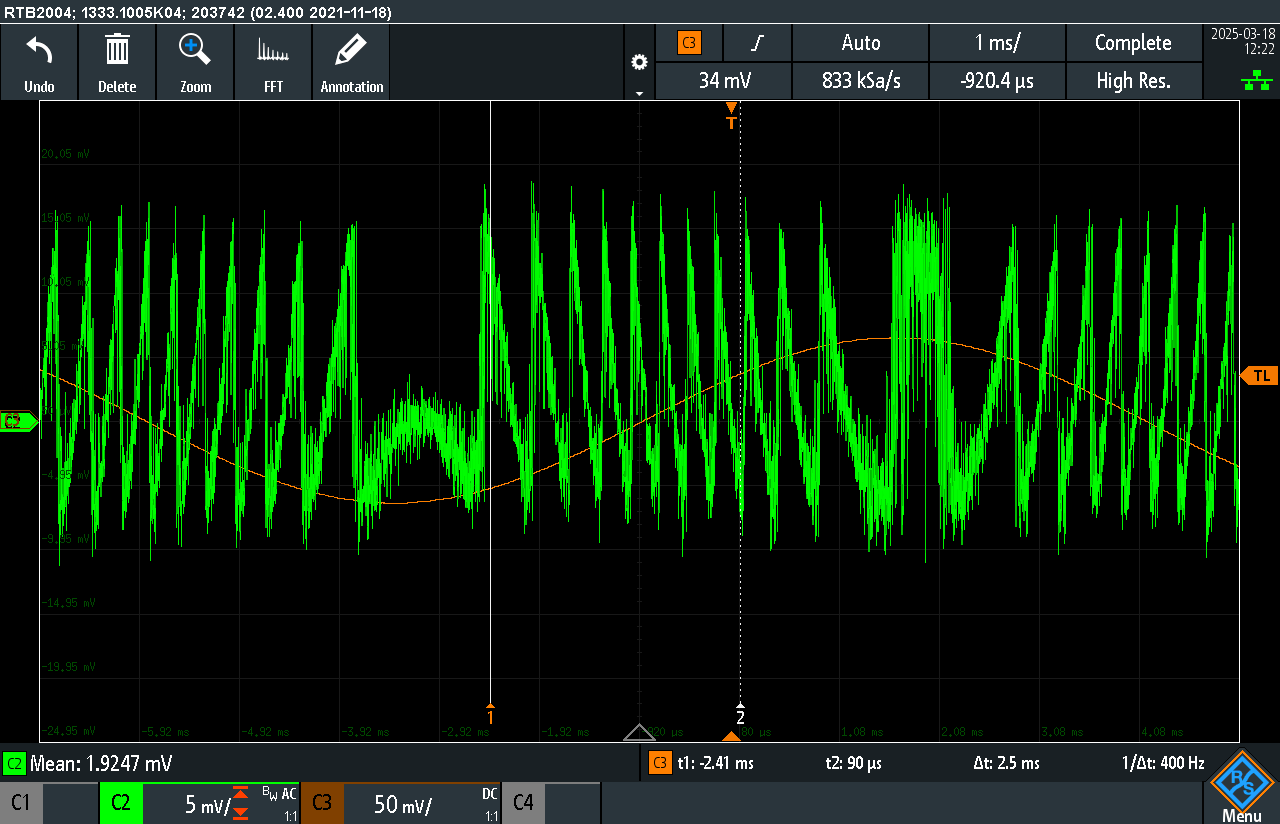

In [4]:
Image('s20250318_screenshot_blue3.png')

The above image was done with the green laser.

The setup includes a mirror (gold) glued on a speaker. The thing works with current between 25mA and 50mA.

The 4A power supply gives too much noise, the 500 mA is somewhat ok.

We tried the 200mA given by Mathias and it is very bad.

# Try ot get basic data with modulation

In [8]:


reload(sm)
reload(rtb)
scope = rtb.RTB('benin.lab21')
scope.acq_state('SINGLE')
time.sleep(1)
x,y,z=scope.get_channels([2,3,4], nbytes=2, fname='s20250318_001')





Rohde&Schwarz,RTB2004,1333.1005k04/203742,02.400


<IPython.core.display.Javascript object>


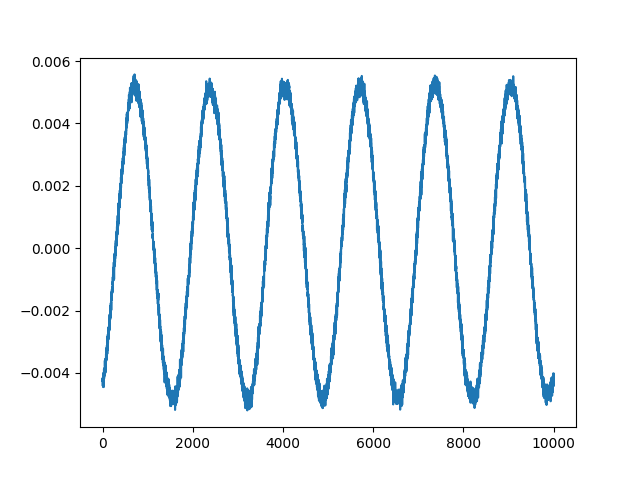

In [11]:
figure()
plot(rtb.scaledata(z))

In [17]:
scope.acq_state('SINGLE')

x,y,z=scope.get_channels([2,3,4], nbytes=2, fname='s20250318_002')


<IPython.core.display.Javascript object>


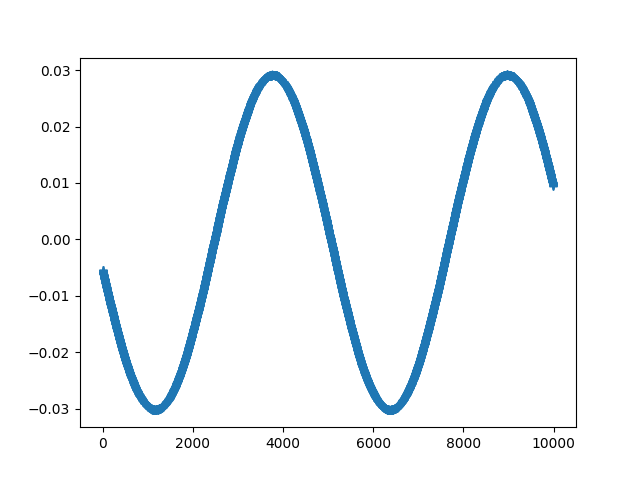

In [18]:
figure()
plot(rtb.scaledata(y), '+')

In [19]:
scope.acq_state('SINGLE')

x,y,z=scope.get_channels([2,3,4], nbytes=2, fname='s20250318_003')


<IPython.core.display.Javascript object>


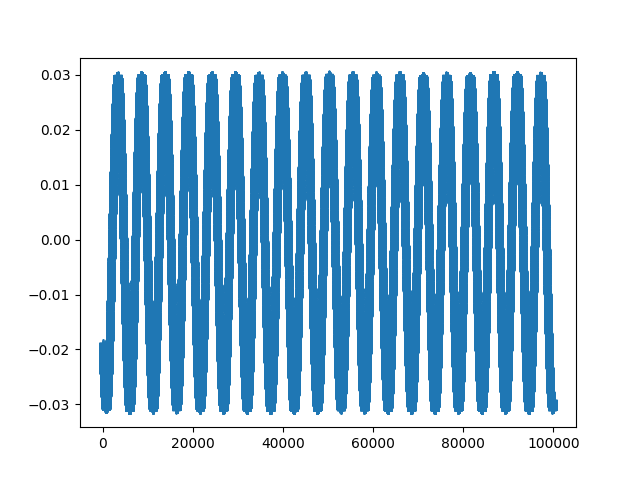

In [20]:
figure()
plot(rtb.scaledata(y), '+')

In [21]:
scope.acq_state('SINGLE')

x,y,z=scope.get_channels([2,3,4], nbytes=2, fname='s20250318_004')

# Now try to scan frequency

In [24]:
fg = hp33500.hp33500('zaire.lab21')

file_index=100
for freq in arange(10,110,10):
    fg.set_frequency(1, freq)
    time.sleep(1)
    scope.acq_state('SINGLE')
    time.sleep(1)
    fname = f's20250318_{file_index:03d}'
    x,y,z=scope.get_channels([2,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, freq)
    scope.acq_state("RUN")



s20250318_100 10
s20250318_101 20
s20250318_102 30
s20250318_103 40
s20250318_104 50
s20250318_105 60
s20250318_106 70
s20250318_107 80
s20250318_108 90
s20250318_109 100


In [25]:
xx = rtb.scaledata(x)

In [26]:
len(xx)

99999

<IPython.core.display.Javascript object>


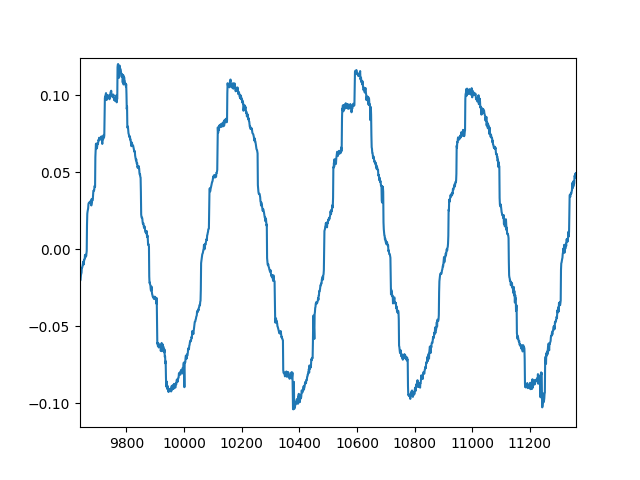

/home/stephane/VirtualEnvs/tensorflow/lib/python3.11/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


In [27]:
figure()
plot(rtb.scaledata(x))

## Now a trace with amplitude modulation of the displacement



In [28]:
scope.acq_state('SINGLE')

x,y,z=scope.get_channels([2,3,4], nbytes=2, fname='s20250318_120')

For all the 100 series, the displacement was set to 100mV amplitude, which is small in principle. The AM modulated trace with AM modulated, 100 depth, 20Hz modulation frequency, centered at 50Hz.

All the above swas done with the blue laser, thorlabs pwer supply 500mA, driven at 29.4mA.

# Now try two modalities with modulation

The blue laser is modulated at 1kHz with 5mV modulation applied to the thorlabs driver 500mA.

In [30]:
file_index=200
for freq in arange(10,110,10):
    fg.set_frequency(1, freq)
    time.sleep(1)
    scope.acq_state('SINGLE')
    time.sleep(1)
    fname = f's20250318_{file_index:03d}'
    x,y,z,t=scope.get_channels([1,2,3,4], nbytes=2, fname=fname)
    file_index +=1
    print(fname, freq)
    scope.acq_state("RUN")



s20250318_200 10
s20250318_201 20
s20250318_202 30
s20250318_203 40
s20250318_204 50
s20250318_205 60
s20250318_206 70
s20250318_207 80
s20250318_208 90
s20250318_209 100


In [34]:
scope.acq_state('SINGLE')

x,y,z,t=scope.get_channels([1,2,3,4], nbytes=2, fname='s20250318_220')

The last one above is with modulation of the blue laser, and modulation of the frequency of the displacement.

# Two modalities without modulation of the blue

The other laser (as above) is my 1310nm laser, as in the paper we wrote. It is driven by one of the Arnaud power supply (7.3mA driven). We measure the voltage at the diode edges and amplify with one of the home made amplifiers by arnaud.

In [32]:
file_index=300
for freq in arange(10,110,10):
    fg.set_frequency(1, freq)
    time.sleep(1)
    scope.acq_state('SINGLE')
    time.sleep(1)
    fname = f's20250318_{file_index:03d}'
    x,y,z=scope.get_channels([1,2,3], nbytes=2, fname=fname)
    file_index +=1
    print(fname, freq)
    scope.acq_state("RUN")



s20250318_300 10
s20250318_301 20
s20250318_302 30
s20250318_303 40
s20250318_304 50
s20250318_305 60
s20250318_306 70
s20250318_307 80
s20250318_308 90
s20250318_309 100


In [33]:
scope.acq_state('SINGLE')

x,y,z=scope.get_channels([1,2,3], nbytes=2, fname='s20250318_320')

# Remarks

The blue laser hits a mirror (gold) glued onto the speaker (central area). The NIR laser hits the speaker in a nearby area (in the cone, very close to center but not stritcly center)

# Back to former lasers: one is the 635nm, one is 1500 onera

In [35]:
scope.acq_state('SINGLE')

x,y,z=scope.get_channels([1,2,3], nbytes=2, fname='s20250318_400')

In [36]:
scope.acq_state('SINGLE')

x,y,z=scope.get_channels([1,2,3], nbytes=2, fname='s20250318_401')

<IPython.core.display.Javascript object>


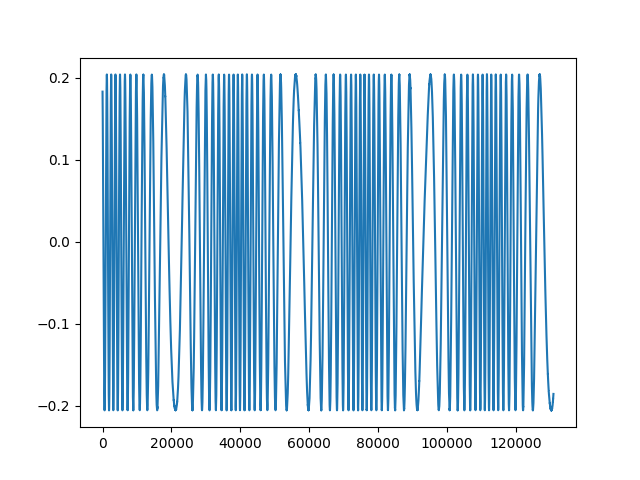

/home/stephane/VirtualEnvs/tensorflow/lib/python3.11/site-packages/matplotlib/backends/backend_nbagg.py:181: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm('matplotlib', data={'id': self.uuid})


In [39]:
figure()
plot(rtb.scaledata(z))

In [38]:
x['settings'].splitlines()

['HEAD:-5.9999832E-01,6.0002580E-01,131008,1',
 'YRES:16',
 'YOR:-3.969923706E-03',
 'YINC:1.525878906E-07',
 'XOR:-5.999983200E-01',
 'XINC:9.160000000E-06',
 'FORM:UINT,16']